# Libs

In [14]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Create Toy Network

In [25]:
G = nx.DiGraph()

In [30]:
grid_size = (4,4)

node_list = []
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        node_list.append((i,j))

In [31]:
for node in node_list:
    G.add_node(node)

In [32]:
max_idx = max(grid_size) - 1
for node in node_list:
    row, col = node
    if row > 0:
        G.add_edge(node,(row - 1,col))
        G.add_edge((row - 1,col),node)
    if col > 0:
        G.add_edge(node,(row,col - 1))
        G.add_edge((row,col - 1),node)
    if row < max_idx:
        G.add_edge(node,(row + 1,col))
        G.add_edge((row + 1,col),node)
    if col < max_idx:
        G.add_edge(node,(row,col + 1))
        G.add_edge((row,col + 1),node)

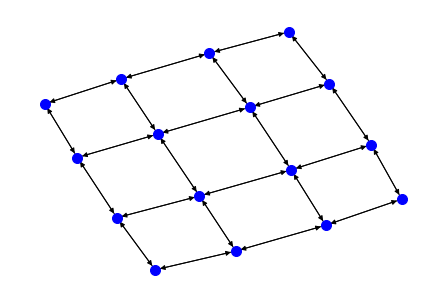

In [55]:
nx.draw(G,node_size=100,node_color='b',edge_color='k')

In [88]:
def cal_direction(edge_idx):
    '''
    edge_idx: [row_diff, col_diff]
    # [1,0] --> heading South
    # [-1,0] --> heading North
    # [0,1] --> heading East
    # [0,-1] --> heading West
    '''
    if edge_idx == [1,0]:
        return 'South'
    elif edge_idx == [-1,0]:
        return 'North'
    elif edge_idx == [0,1]:
        return 'East'
    elif edge_idx == [0,-1]:
        return 'West'
    else:
        print('Wrong edge index!')


def is_margin(node_idx,max_idx):
    '''
    node_idx: (row, col)
    '''
    row, col = node_idx
    if (row == 0) or (col == 0) or (row == max_idx) or (col == max_idx):
        return True
    else:
        return False

In [83]:
G_mv = nx.DiGraph()
direction_to_mv_origin = {'South':[-1,0],'North':[0,1],'East':[0,1],'West':[-1,0]}
for new_node in G.edges():
    new_node_ls = list(new_node)
    direction = cal_direction([new_node_ls[1][i] - new_node_ls[0][i] for i in range(2)])
    
    # o-node is margin
    if is_margin(new_node_ls[0],max_idx):
        mv_ls_origin = direction_to_mv_origin[direction]
    else:
        mv_ls_origin = [-1,0,1]
    
    # d-node is margin
    if is_margin(new_node_ls[0],max_idx):
        mv_ls_destination = [-1,1]
    else:
        mv_ls_destination = [-1,0,1]
    
    mv_ls = list(set(mv_ls_origin).intersection(set(mv_ls_destination)))
    for mv in mv_ls:
        G_mv.add_node(tuple(list(new_node) + [mv]))

In [97]:
fn_row_minus = lambda a:(a[0] - 1,a[1])
fn_row_plus = lambda a:(a[0] + 1,a[1])
fn_col_minus = lambda a:(a[0],a[1] - 1)
fn_col_plus = lambda a:(a[0],a[1] + 1)

In [89]:
for node in G_mv.node():
    print(node)
    direction = cal_direction([node[1][i] - node[0][i] for i in range(2)])
    print(direction)
    # South, -1 --> col + 1; South, 0 --> row + 1; South, 1 --> col - 1
    # North, -1 --> col - 1; North, 0 --> row - 1; North, 1 --> col + 1
    # East, -1 --> row - 1; East, 0 --> col - 1; East, 1 --> row + 1
    # West, -1 --> row + 1; West, 0 --> col + 1; West, 1 --> row - 1
    from_node = node[1]
    if (direction,node[-1]) in [('South',0),('East',1),('West',-1)]:
        to_node = fn_row_plus(node(1))
    elif (direction,node[-1]) in [('South',0),('East',1),('West',-1)]:
        
    break

((0, 0), (1, 0), -1)
South
